<a href="https://colab.research.google.com/github/AnnaPechenina/2016-08-23-unt-github-collaboration/blob/master/Intro_to_Python_Day_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adapted from Erica Yan's lecture note


# Day 9 
## Agenda


1.   beautiful soup
2.   Regular expression
3.   An exmaple of data analysis


![meme](https://miro.medium.com/max/550/0*Bj_O1jRFzZjKxzi4.jpg)

## Dataset creation
beautiful soup 

In [ ]:
import requests 

page = requests.get("https://stacker.com/stories/1587/100-best-movies-all-time")

page

<Response [200]>

In [ ]:
page.content

In [ ]:
#prepare our soup 

from bs4 import BeautifulSoup as bs 

soup = bs(page.content, "html.parser")

print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en" prefix="content: http://purl.org/rss/1.0/modules/content/  dc: http://purl.org/dc/terms/  foaf: http://xmlns.com/foaf/0.1/  og: http://ogp.me/ns#  rdfs: http://www.w3.org/2000/01/rdf-schema#  schema: http://schema.org/  sioc: http://rdfs.org/sioc/ns#  sioct: http://rdfs.org/sioc/types#  skos: http://www.w3.org/2004/02/skos/core#  xsd: http://www.w3.org/2001/XMLSchema# ">
 <head>
  <script src="https://cdn.cookielaw.org/consent/1c2b5709-249d-4509-8706-f16fe40c52d8/OtAutoBlock.js" type="text/javascript">
  </script>
  <script charset="UTF-8" data-domain-script="1c2b5709-249d-4509-8706-f16fe40c52d8" src="https://cdn.cookielaw.org/scripttemplates/otSDKStub.js" type="text/javascript">
  </script>
  <script type="text/javascript">
   function OptanonWrapper() { }
  </script>
  <meta charset="utf-8"/>
  <script type="text/javascript">
   (window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={li

In [ ]:
div_caption = soup.select(".ct-slideshow__slide__text-container .ct-slideshow__slide__text-container__caption")
div_caption[1]


<h2 class="ct-slideshow__slide__text-container__caption">
<div>#100. Amadeus (1984)</div>
</h2>

In [ ]:
movie_info  = [ item.div.get_text() for item in div_caption]
movie_info[1]

'#100. Amadeus (1984)'

Regular expression: https://www.w3schools.com/python/python_regex.asp

In [ ]:
import re 

movie_heading = [ re.findall("\w+", item) for item in movie_info[1:]]
movie_heading
movie_heading[1]

['99', 'The', 'Hurt', 'Locker', '2008']

In [ ]:
#empty list 
#.append()
ranking = []
year = []
name = []

for item in movie_heading: 
    ranking.append(int(item[0]))
    year.append(int(item[-1]))
    name.append(" ".join(item[1:-1]))
print(ranking)
print(year)
print(name)

[100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
[1984, 2008, 2015, 1998, 2003, 1991, 1928, 1939, 1967, 2019, 1978, 1946, 2007, 1954, 1967, 1977, 2000, 1997, 2010, 2007, 2004, 1985, 1975, 1971, 1943, 1962, 1956, 1964, 1940, 2018, 2013, 2016, 1986, 2016, 2017, 2014, 2013, 1979, 1994, 1994, 1969, 1940, 2019, 2016, 2019, 1974, 2015, 2002, 2008, 1959, 1940, 1962, 1946, 1991, 2007, 2010, 1938, 1940, 1951, 1941, 1968, 2015, 2007, 1977, 1960, 2013, 1976, 1990, 1998, 1944, 1939, 1979, 1995, 1955, 1946, 1958, 1959, 2014, 2008, 1948, 1950, 1939, 1974, 2001, 1957, 1936, 1959, 1964, 1952, 1960, 1958, 1941, 1993, 2003, 1994, 1931, 1954, 1942, 1957, 1972]
['Amad

In [ ]:
description = soup.select("div.ct-slideshow__slide__text-container__description div")
a = description[1].p.get_text()
re.findall(":(.*)", a)

[' Milos Forman', ' 89.1', ' 88', ' 8.3', ' 160 minutes']

In [ ]:
a

'- Director: Milos Forman\n- Stacker score: 89.1\n- Metascore: 88\n- IMDb user rating: 8.3\n- Runtime: 160 minutes'

In [ ]:
#director = list()
director = []
stacker =[]
metascore =[]
IMDb = []
runtime =[]

for item in description[1:]:
    temp = re.split("\n", item.p.get_text())
    info = [re.findall( ":(.*)", element)[0].strip() for element in temp]
    director.append(info[0].strip())
    stacker.append(float(info[1]))
    metascore.append(float(info[2]))
    IMDb.append(float(info[3]))
    runtime.append(float(re.findall("\d+", info[4])[0]))

print(runtime)


[160.0, 131.0, 120.0, 103.0, 100.0, 118.0, 72.0, 96.0, 88.0, 135.0, 94.0, 170.0, 112.0, 108.0, 127.0, 93.0, 120.0, 138.0, 120.0, 122.0, 108.0, 116.0, 160.0, 118.0, 108.0, 126.0, 119.0, 170.0, 88.0, 135.0, 109.0, 111.0, 120.0, 128.0, 106.0, 106.0, 91.0, 117.0, 88.0, 142.0, 135.0, 125.0, 137.0, 137.0, 209.0, 130.0, 129.0, 179.0, 152.0, 161.0, 112.0, 123.0, 130.0, 84.0, 158.0, 103.0, 102.0, 129.0, 122.0, 100.0, 137.0, 95.0, 111.0, 121.0, 125.0, 134.0, 114.0, 146.0, 169.0, 107.0, 238.0, 147.0, 81.0, 92.0, 102.0, 95.0, 121.0, 165.0, 98.0, 126.0, 138.0, 102.0, 202.0, 178.0, 96.0, 87.0, 136.0, 95.0, 103.0, 109.0, 128.0, 119.0, 195.0, 201.0, 154.0, 87.0, 112.0, 102.0, 96.0, 175.0]


In [ ]:
print(director)

['Milos Forman', 'Kathryn Bigelow', 'George Miller', 'Peter Weir', 'Andrew Stanton, Lee Unkrich', 'Jonathan Demme', 'Charles Chaplin', 'John Ford', 'Mel Brooks', 'Greta Gerwig', 'Terrence Malick', 'William Wyler', 'Julian Schnabel', 'Elia Kazan', 'Stuart Rosenberg', 'Woody Allen', 'Ang Lee', 'Curtis Hanson', 'David Fincher', 'Ethan Coen, Joel Coen', 'Michel Gondry', 'Robert Zemeckis', 'Robert Altman', 'Peter Bogdanovich', 'Alfred Hitchcock', 'John Frankenheimer', 'John Ford', 'George Cukor', 'Norman Ferguson, T. Hee, Wilfred Jackson, Jack Kinney, Hamilton Luske, Bill Roberts, Ben Sharpsteen', 'Alfonso Cuarón', 'Richard Linklater', 'Barry Jenkins', 'Oliver Stone', 'Damien Chazelle', 'Christopher Nolan', 'Damien Chazelle', 'Alfonso Cuarón', 'Ridley Scott', 'Roger Allers, Rob Minkoff', 'Frank Darabont', 'Sam Peckinpah', 'James Algar, Samuel Armstrong, Ford Beebe Jr., Norman Ferguson, David Hand, Jim Handley, T. Hee, Wilfred Jackson, Hamilton Luske, Bill Roberts, Paul Satterfield, Ben Shar

## Data analysis 

In [ ]:
import pandas as pd 
import numpy as np 

#create a dataframe using dictionary 
movie = pd.DataFrame({
    "Name": name, 
    "Year": year,
    "Director":director,
    "Runtime": runtime,
    "Raking": ranking,
    "Stacker": stacker,
    "IMDb": IMDb, 
    "Metascore":metascore 
}
)
movie.head(10)

,Name,Year,Director,Runtime,Raking,Stacker,IMDb,Metascore
0,Amadeus,1984,Milos Forman,160.0,100,89.1,8.3,88.0
1,The Hurt Locker,2008,Kathryn Bigelow,131.0,99,89.1,7.6,95.0
2,Mad Max Fury Road,2015,George Miller,120.0,98,89.1,8.1,90.0
3,The Truman Show,1998,Peter Weir,103.0,97,89.1,8.1,90.0
4,Finding Nemo,2003,"Andrew Stanton, Lee Unkrich",100.0,96,89.1,8.1,90.0
5,The Silence of the Lambs,1991,Jonathan Demme,118.0,95,89.1,8.6,85.0
6,The Circus,1928,Charles Chaplin,72.0,94,89.6,8.2,90.0
7,Stagecoach,1939,John Ford,96.0,93,89.6,7.9,93.0
8,The Producers,1967,Mel Brooks,88.0,92,89.6,7.6,96.0
9,Little Women,2019,Greta Gerwig,135.0,91,89.6,8.1,91.0


In [ ]:
movie.describe()

,Year,Runtime,Raking,Stacker,IMDb,Metascore
count,100.000000,100.000000,100.000000,100.000000,100.0000,100.000000
mean,1977.880000,124.890000,50.500000,91.644000,8.1930,94.020000
std,27.633342,30.749524,29.011492,2.176194,0.3677,3.895037
min,1928.000000,72.000000,1.000000,89.100000,7.4000,80.000000
25%,1954.750000,102.750000,25.750000,90.100000,8.0000,92.000000
50%,1976.500000,120.000000,50.500000,91.100000,8.1000,94.000000
75%,2004.750000,137.000000,75.250000,93.200000,8.4000,96.000000
max,2019.000000,238.000000,100.000000,100.000000,9.3000,100.000000


In [ ]:
cols = list(movie.columns)
cols

movie = movie[cols[4:5]+cols[0:4]+cols[5:]]
movie.head(10)

,Raking,Name,Year,Director,Runtime,Stacker,IMDb,Metascore
0,100,Amadeus,1984,Milos Forman,160.0,89.1,8.3,88.0
1,99,The Hurt Locker,2008,Kathryn Bigelow,131.0,89.1,7.6,95.0
2,98,Mad Max Fury Road,2015,George Miller,120.0,89.1,8.1,90.0
3,97,The Truman Show,1998,Peter Weir,103.0,89.1,8.1,90.0
4,96,Finding Nemo,2003,"Andrew Stanton, Lee Unkrich",100.0,89.1,8.1,90.0
5,95,The Silence of the Lambs,1991,Jonathan Demme,118.0,89.1,8.6,85.0
6,94,The Circus,1928,Charles Chaplin,72.0,89.6,8.2,90.0
7,93,Stagecoach,1939,John Ford,96.0,89.6,7.9,93.0
8,92,The Producers,1967,Mel Brooks,88.0,89.6,7.6,96.0
9,91,Little Women,2019,Greta Gerwig,135.0,89.6,8.1,91.0


In [ ]:
#.rename(index =  columns={}) function 
#remember that rename function will return use with a copy of the dataframe
movie = movie.rename(columns={"Raking":"Ranking", "IMDb":"IMDb score"})
movie.head(10)

,Ranking,Name,Year,Director,Runtime,Stacker,IMDb score,Metascore
0,100,Amadeus,1984,Milos Forman,160.0,89.1,8.3,88.0
1,99,The Hurt Locker,2008,Kathryn Bigelow,131.0,89.1,7.6,95.0
2,98,Mad Max Fury Road,2015,George Miller,120.0,89.1,8.1,90.0
3,97,The Truman Show,1998,Peter Weir,103.0,89.1,8.1,90.0
4,96,Finding Nemo,2003,"Andrew Stanton, Lee Unkrich",100.0,89.1,8.1,90.0
5,95,The Silence of the Lambs,1991,Jonathan Demme,118.0,89.1,8.6,85.0
6,94,The Circus,1928,Charles Chaplin,72.0,89.6,8.2,90.0
7,93,Stagecoach,1939,John Ford,96.0,89.6,7.9,93.0
8,92,The Producers,1967,Mel Brooks,88.0,89.6,7.6,96.0
9,91,Little Women,2019,Greta Gerwig,135.0,89.6,8.1,91.0


In [ ]:
#boolean masking to filter out the data
#boolean array
movie[movie["Runtime"]>100]
movie[movie["IMDb score"]>8.4]

,Ranking,Name,Year,Director,Runtime,Stacker,IMDb score,Metascore
5,95,The Silence of the Lambs,1991,Jonathan Demme,118.0,89.1,8.6,85.0
21,79,Back to the Future,1985,Robert Zemeckis,116.0,89.6,8.5,87.0
35,65,Whiplash,2014,Damien Chazelle,106.0,90.1,8.5,88.0
38,62,The Lion King,1994,"Roger Allers, Rob Minkoff",88.0,90.1,8.5,88.0
39,61,The Shawshank Redemption,1994,Frank Darabont,142.0,90.1,9.3,80.0
47,53,The Lord of the Rings The Two Towers,2002,Peter Jackson,179.0,90.6,8.7,87.0
48,52,The Dark Knight,2008,Christopher Nolan,152.0,90.6,9.0,84.0
52,48,It s a Wonderful Life,1946,Frank Capra,130.0,91.1,8.6,89.0
63,37,Star Wars Episode IV A New Hope,1977,George Lucas,121.0,91.7,8.6,90.0
67,33,Goodfellas,1990,Martin Scorsese,146.0,92.2,8.7,90.0


In [ ]:
#create a new score based on different metrics 
#total score 
#broadcasting
movie["Total score"] = (movie["Stacker"] + movie["Metascore"] +movie["IMDb score"] *10)/3
movie.tail(20)

,Ranking,Name,Year,Director,Runtime,Stacker,IMDb score,Metascore,Total score
80,20,All About Eve,1950,Joseph L. Mankiewicz,138.0,93.8,8.2,98.0,91.266667
81,19,The Wizard of Oz,1939,"Victor Fleming, George Cukor, Mervyn LeRoy, No...",102.0,93.8,8.0,100.0,91.266667
82,18,The Godfather Part II,1974,Francis Ford Coppola,202.0,93.8,9.0,90.0,91.266667
83,17,The Lord of the Rings The Fellowship of the Ring,2001,Peter Jackson,178.0,93.8,8.8,92.0,91.266667
84,16,Sweet Smell of Success,1957,Alexander Mackendrick,96.0,94.3,8.1,100.0,91.766667
85,15,Modern Times,1936,Charles Chaplin,87.0,94.3,8.5,96.0,91.766667
86,14,North by Northwest,1959,Alfred Hitchcock,136.0,94.3,8.3,98.0,91.766667
87,13,Dr Strangelove or How I Learned to Stop Worryi...,1964,Stanley Kubrick,95.0,94.3,8.4,97.0,91.766667
88,12,Singin in the Rain,1952,"Stanley Donen, Gene Kelly",103.0,94.8,8.3,99.0,92.266667
89,11,Psycho,1960,Alfred Hitchcock,109.0,94.8,8.5,97.0,92.266667


In [ ]:
movie["Total score"].describe()

count    100.000000
mean      89.198000
std        2.118286
min       86.700000
25%       87.700000
50%       88.700000
75%       90.733333
max       97.333333
Name: Total score, dtype: float64

In [ ]:
#group by its released year 
#groupby year 
by_year = movie.groupby(["Year"]).mean()
#len(by_year)
#.unique()
movie["Year"].unique()

array([1984, 2008, 2015, 1998, 2003, 1991, 1928, 1939, 1967, 2019, 1978,
       1946, 2007, 1954, 1977, 2000, 1997, 2010, 2004, 1985, 1975, 1971,
       1943, 1962, 1956, 1964, 1940, 2018, 2013, 2016, 1986, 2017, 2014,
       1979, 1994, 1969, 1974, 2002, 1959, 1938, 1951, 1941, 1968, 1960,
       1976, 1990, 1944, 1995, 1955, 1958, 1948, 1950, 2001, 1957, 1936,
       1952, 1993, 1931, 1942, 1972])

In [ ]:
#create a category - reputation - > 90 :"very high"; 88 <"high"<90 "average" <88
#based on the total score 
#movie.loc[cond, column] = value
movie.loc[  movie["Total score"].gt(90)  , "Reputation"] = "Very high"
movie.loc[ (movie["Total score"].gt(88)) & (movie["Total score"].lt(90)) , "Reputation"] = "High"
movie.loc[ movie["Total score"].lt(88), "Reputation"] = "Average"
movie.tail(10)

,Reputation,Year,Ranking,Name,Director,Runtime,Stacker,IMDb score,Metascore,Total score
90,Very high,1958,10,Vertigo,Alfred Hitchcock,128.0,95.3,8.3,100.0,92.766667
91,Very high,1941,9,Citizen Kane,Orson Welles,119.0,95.3,8.3,100.0,92.766667
92,Very high,1993,8,Schindler s List,Steven Spielberg,195.0,95.3,8.9,94.0,92.766667
93,Very high,2003,7,The Lord of the Rings The Return of the King,Peter Jackson,201.0,95.3,8.9,94.0,92.766667
94,Very high,1994,6,Pulp Fiction,Quentin Tarantino,154.0,95.3,8.9,94.0,92.766667
95,Very high,1931,5,City Lights,Charles Chaplin,87.0,95.8,8.5,99.0,93.266667
96,Very high,1954,4,Rear Window,Alfred Hitchcock,112.0,95.8,8.4,100.0,93.266667
97,Very high,1942,3,Casablanca,Michael Curtiz,102.0,96.4,8.5,100.0,93.800000
98,Very high,1957,2,12 Angry Men,Sidney Lumet,96.0,96.4,8.9,96.0,93.800000
99,Very high,1972,1,The Godfather,Francis Ford Coppola,175.0,100.0,9.2,100.0,97.333333


In [ ]:
#multiple indexing 
movie.set_index(["Reputation","Year"], inplace = True)
movie.head(10)

Ranking                      Name  \
Reputation Year                                      
Average    1984      100                   Amadeus   
           2008       99           The Hurt Locker   
           2015       98         Mad Max Fury Road   
           1998       97           The Truman Show   
           2003       96              Finding Nemo   
           1991       95  The Silence of the Lambs   
           1928       94                The Circus   
           1939       93                Stagecoach   
           1967       92             The Producers   
           2019       91              Little Women   

                                    Director  Runtime  Stacker  IMDb score  \
Reputation Year                                                              
Average    1984                 Milos Forman    160.0     89.1         8.3   
           2008              Kathryn Bigelow    131.0     89.1         7.6   
           2015                George Miller    120.0     89.1         8.1   
           1998                   Peter Weir    103.0     89.1         8.1   
           2003  Andrew Stanton, Lee Unkrich    100.0     89.1         8.1   
           1991               Jonathan Demme    118.0     89.1         8.6   
           1928              Charles Chaplin     72.0     89.6         8.2   
           1939                    John Ford     96.0     89.6         7.9   
           1967                   Mel Brooks     88.0     89.6         7.6   
           2019                 Greta Gerwig    135.0     89.6         8.1   

                 Metascore  Total score  
Reputation Year                          
Average    1984       88.0         86.7  
           2008       95.0         86.7  
           2015       90.0         86.7  
           1998       90.0         86.7  
           2003       90.0         86.7  
           1991       85.0         86.7  
           1928       90.0         87.2  
           1939       93.0         87.2  
           1967       96.0         87.2  
           2019       91.0         87.2

In [ ]:
#pivot table 
pivot_1 = pd.pivot_table(movie, values = "Runtime" , index=["Reputation"], columns =["Year"], aggfunc = np.mean)
pivot_1

Year,1928,1931,1936,1938,1939,1940,1941,1942,1943,1944,...,2007,2008,2010,2013,2014,2015,2016,2017,2018,2019
Reputation,,,,,,,,,,,,,,,,,,,,,
Average,72.0,NaN,NaN,NaN,96.0,88.0,NaN,NaN,108.0,NaN,...,117.0,131.0,120.0,100.0,106.0,120.0,119.5,106.0,135.0,135.0
High,NaN,NaN,NaN,102.0,NaN,122.0,100.0,NaN,NaN,NaN,...,134.5,152.0,103.0,134.0,NaN,112.0,137.0,NaN,NaN,173.0
Very high,NaN,87.0,87.0,NaN,170.0,NaN,119.0,102.0,NaN,107.0,...,NaN,98.0,NaN,NaN,165.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
pivot_2 = pd.pivot_table(movie, values = "Total score" , index=["Reputation"], columns =["Year"], aggfunc = np.mean)
pivot_2

Year,1928,1931,1936,1938,1939,1940,1941,1942,1943,1944,...,2007,2008,2010,2013,2014,2015,2016,2017,2018,2019
Reputation,,,,,,,,,,,,,,,,,,,,,
Average,87.2,NaN,NaN,NaN,87.20,87.700000,NaN,NaN,87.7,NaN,...,87.200000,86.700000,87.2,87.700000,87.700000,86.700000,87.7,87.7,87.7,87.2
High,NaN,NaN,NaN,89.233333,NaN,88.711111,89.233333,NaN,NaN,NaN,...,88.966667,88.200000,88.7,89.733333,NaN,88.716667,88.2,NaN,NaN,88.2
Very high,NaN,93.266667,91.766667,NaN,90.75,NaN,92.766667,93.8,NaN,90.233333,...,NaN,90.733333,NaN,NaN,90.733333,NaN,NaN,NaN,NaN,NaN


## Data visualization
Matplotlib, Seaborn

In [ ]:
import matplotlib.pyplot as plt 
movie.reset_index(inplace =True)

In [ ]:
#histgram - distribution of IMDb score 
# average IMDb score in each year 
y = movie.groupby(["Year"]).mean()["IMDb score"]
y.head(5)


Year
1928    8.2
1931    8.5
1936    8.5
1938    7.9
1939    8.0
Name: IMDb score, dtype: float64

Text(0.5, 1.0, 'Distribution of IMDb score')

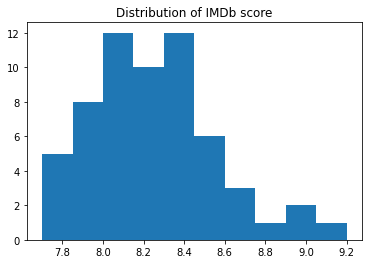

In [ ]:
plt.hist(y)
plt.title("Distribution of IMDb score")

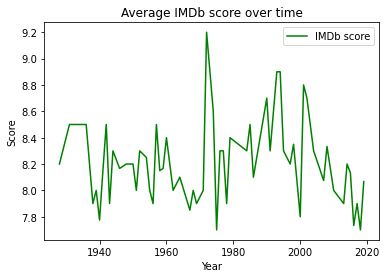

In [ ]:
#IMDb score change over year 
year = y.index
figure, axes = plt.subplots(figsize = (6,4))
axes.plot(year, y , 'g', label = "IMDb score")
axes.set_title("Average IMDb score over time")
axes.set_xlabel("Year")
axes.set_ylabel("Score")
axes.legend()

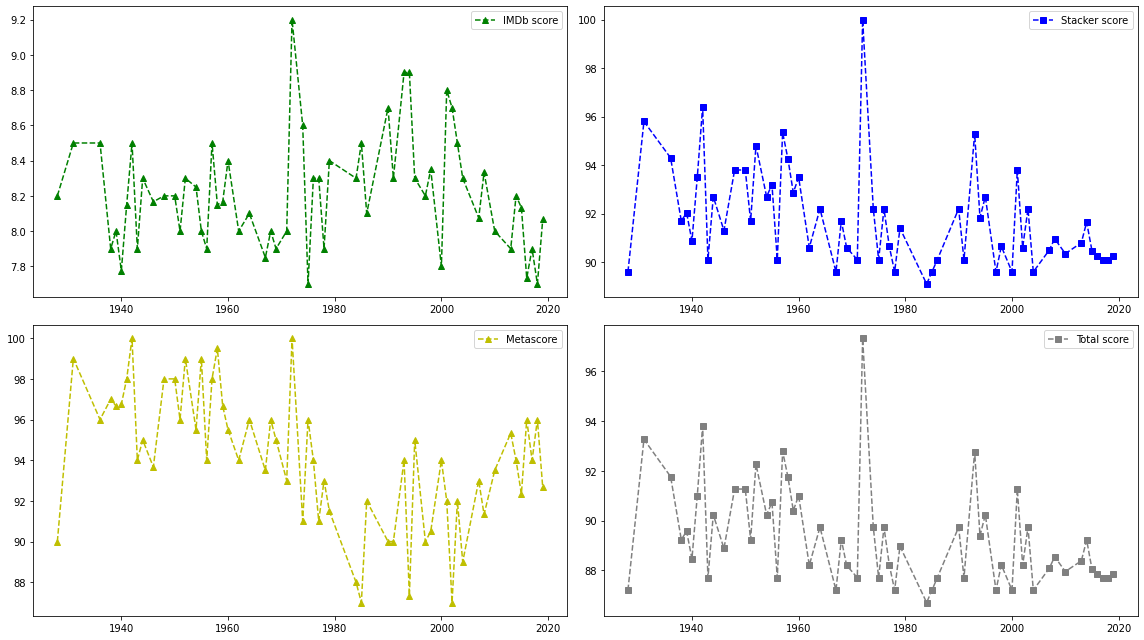

In [ ]:
#subplots

mean_score = movie.groupby(["Year"]).mean()
year = mean_score.index

figure = plt.figure(figsize =(16, 9))

axes_1 = figure.add_subplot(221)
axes_1.plot(year, mean_score["IMDb score"], 'g', label = "IMDb score", marker="^", ls ="--")
axes_1.legend()
axes_2 = figure.add_subplot(222)
axes_2.plot(year, mean_score["Stacker"], 'b', label = "Stacker score", marker="s", ls ="--")
axes_2.legend()
axes_3 = figure.add_subplot(223)
axes_3.plot(year, mean_score["Metascore"], 'y', label = "Metascore", marker="^", ls ="--")
axes_3.legend()
axes_4 = figure.add_subplot(224)
axes_4.plot(year, mean_score["Total score"], 'grey', label = "Total score", marker="s", ls ="--")
axes_4.legend()

figure.tight_layout()
